In [1]:
import random
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchaudio

from torch.utils.data import Sampler
from torch.utils.data import Dataset

In [ ]:
NO DOWNSAMPLING IF USING SPECTROGRAM

In [2]:
min_seq = 1
max_seq = 3
downsampling = 4

In [3]:
path_train_voxceleb = "../data/VoxCeleb/prepared_data/train/"

In [45]:
sample_audio = ""
for root, folders, files in os.walk(path_train_voxceleb):
    if files:
        print(root)
        print(folders)
        print(files)
        sample_audio = os.path.join(root, files[0])
        break;

../data/VoxCeleb/prepared_data/train/aac/id08149/msudF6HwuuI
[]
['00046.wav']


In [46]:
sample_audio

'../data/VoxCeleb/prepared_data/train/aac/id08149/msudF6HwuuI/00046.wav'

In [47]:
sample, samplerate = torchaudio.load(sample_audio)

Shape of waveform: torch.Size([1, 80896])
Sample rate of waveform: 16000


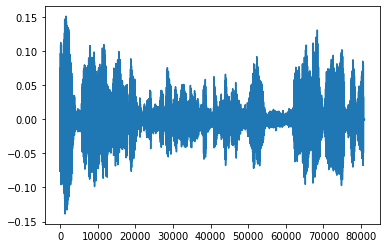

In [48]:
print("Shape of waveform: {}".format(sample.size()))
print("Sample rate of waveform: {}".format(samplerate))

plt.figure()
plt.plot(sample.t().numpy())

In [49]:
#random sequence length between min and max length
if (int)(sample.shape[-1]/samplerate) >= max_seq:
    seq_length = (int)(random.uniform(min_seq, max_seq)*samplerate)
    print(seq_length)
    index = random.randrange(0,sample.shape[-1]-seq_length)
    sample = sample[:,index:index+seq_length]

#add padding at the end to make max length sequence
padding = torch.zeros(max_seq*samplerate - sample.shape[-1]).unsqueeze(0)
sample = torch.cat((sample,padding),1)

#downsample kHz
#sample = sample[:,::downsampling]

22164


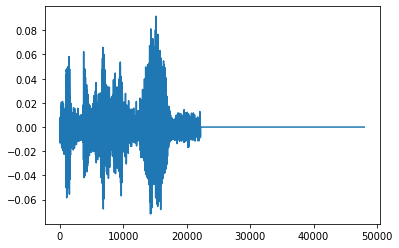

In [50]:
plt.figure()
plt.plot(sample.t().numpy())

In [123]:
sample = sample[:,:16000]

In [124]:
sample.shape

torch.Size([1, 16000])

In [125]:
spectrogram = torchaudio.transforms.Spectrogram(n_fft=255, hop_length=160)(sample)

Shape of spectrogram: torch.Size([1, 128, 100])


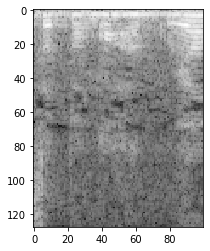

In [126]:
print("Shape of spectrogram: {}".format(spectrogram.size()))

plt.figure()
plt.imshow(spectrogram.log2()[0,:,:].numpy(), cmap='gray')

In [93]:
def time_standard(time):
    return((int)((time - 3)/2) + 1)

In [94]:
def time_freq_calc(time):
    time = (int)((time - 7)/2) + 1
    time = time_standard(time_standard(time_standard(time_standard(time))))
    return(time)

In [119]:
time = 300

In [120]:
answer = time_freq_calc(time)

In [121]:
answer

8